# Best approach

### Import data and binary glove model saved in form of .npy format

In [1]:
import numpy as np
wordsList = np.load('./data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./data/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [3]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]


array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

In [4]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [5]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


### Load dataset

In [6]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['./data/positiveReviews/' + f for f in listdir('./data/positiveReviews/') if isfile(join('./data/positiveReviews/', f))]
negativeFiles = ['./data/negativeReviews/' + f for f in listdir('./data/negativeReviews/') if isfile(join('./data/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r") as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r") as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
('The total number of files is', 25000)
('The total number of words in the files is', 5844464)
('The average number of words in the files is', 233)


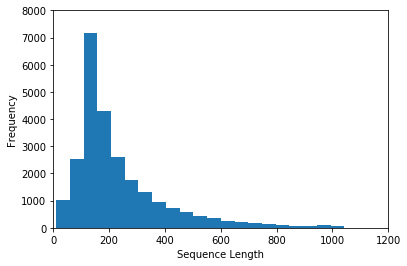

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [8]:
maxSeqLength = 250

In [9]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

The Secret of Kells is an independent, animated feature that gives us one of the fabled stories surrounding the Book of Kells, an illuminated manuscript from the Middle Ages featuring the four Gospels of the New Testament. I didn't know that this book actually exists, but knowing it now makes my interpretation and analysis much a lot easier. There are a few stories and ideas floating around about how the book came to be, who wrote it, and how it has survived over 1,000 years. This is one of them.<br /><br />We are introduced to Brendan, an orphan who lives at the Abbey of Kells in Ireland with his uncle, Abbot Cellach (voiced by Brendan Gleeson). Abbot Cellach is constructing a massive wall around the abbey to protect the villagers and monks. Brendan is not fond of the wall and neither are the other monks. They are more focused on reading and writing, something Abbot Cellach does not have time for anymore. He fears the "Northmen," those who plunder and leave towns and villages empty an

In [10]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

### Load in a pre-computed IDs matrix

In [11]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0
# for pf in positiveFiles:
#    with open(pf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 

# for nf in negativeFiles:
#    with open(nf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 
# #Pass into embedding function and see if it evaluates. 
# np.save('idsMatrix', ids)

In [12]:
ids = np.load('./data/idsMatrix.npy')

### Prepare Train and Test dataset

In [13]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels


### Define the hyper parameters

In [14]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

### Start building neural network

In [15]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [16]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [17]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [18]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [19]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))


In [20]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [21]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

### Train model

In [22]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
   #Next Batch of reviews
   nextBatch, nextBatchLabels = getTrainBatch();
   sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
   #Write summary to Tensorboard
   if (i % 50 == 0):
       summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
       writer.add_summary(summary, i)

   #Save the network every 10,000 training iterations
   if (i % 10000 == 0 and i != 0):
       save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
       print("saved to %s" % save_path)
writer.close()

# After running this cell use the following command to see the training progres on tensorboard.
# Step 1: go to the directory where you save this ipython notebook and execute this command
# Step 2: $tensorboard --logdir=tensorboard 
# Step 3: there is one link is coming where tensorboard running usually it is http://localhost:6006/
# After sept 2 in my case the link is poping with the following message.
           # this will Starting TensorBoard 54 at http://jalaj:6006

saved to models/pretrained_lstm.ckpt-10000
saved to models/pretrained_lstm.ckpt-20000
saved to models/pretrained_lstm.ckpt-30000
saved to models/pretrained_lstm.ckpt-40000
saved to models/pretrained_lstm.ckpt-50000
saved to models/pretrained_lstm.ckpt-60000
saved to models/pretrained_lstm.ckpt-70000
saved to models/pretrained_lstm.ckpt-80000
saved to models/pretrained_lstm.ckpt-90000


### Load trained model

In [23]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-90000


### Generate test accuracy for testing dataset

In [24]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

('Accuracy for this batch:', 87.5)
('Accuracy for this batch:', 83.333337306976318)
('Accuracy for this batch:', 75.0)
('Accuracy for this batch:', 91.666668653488159)
('Accuracy for this batch:', 87.5)
('Accuracy for this batch:', 83.333337306976318)
('Accuracy for this batch:', 91.666668653488159)
('Accuracy for this batch:', 83.333337306976318)
('Accuracy for this batch:', 79.166668653488159)
('Accuracy for this batch:', 91.666668653488159)


### Test the trained model

In [26]:
numDimensions = 300
maxSeqLength = 250
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

In [27]:
import numpy as np
wordsList = np.load('./data/wordsList.npy').tolist()
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./data/wordVectors.npy')

In [28]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.25)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [29]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-90000


In [30]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

def getSentenceMatrix(sentence):
    arr = np.zeros([batchSize, maxSeqLength])
    sentenceMatrix = np.zeros([batchSize,maxSeqLength], dtype='int32')
    cleanedSentence = cleanSentences(sentence)
    split = cleanedSentence.split()
    for indexCounter,word in enumerate(split):
        try:
            sentenceMatrix[0,indexCounter] = wordsList.index(word)
        except ValueError:
            sentenceMatrix[0,indexCounter] = 399999 #Vector for unkown words
    return sentenceMatrix

In [31]:
inputText = "That movie was terrible."
inputMatrix = getSentenceMatrix(inputText)

In [32]:
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
# predictedSentiment[0] represents output score for positive sentiment
# predictedSentiment[1] represents output score for negative sentiment

if (predictedSentiment[0] > predictedSentiment[1]):
    print "Positive Sentiment"
else:
    print "Negative Sentiment"

Negative Sentiment


In [33]:
secondInputText = "That movie was the best one I have ever seen."
secondInputMatrix = getSentenceMatrix(secondInputText)

In [34]:
predictedSentiment = sess.run(prediction, {input_data: secondInputMatrix})[0]
if (predictedSentiment[0] > predictedSentiment[1]):
    print "Positive Sentiment"
else:
    print "Negative Sentiment"


Positive Sentiment


In [35]:
thirdInputText = "That movie was not that grate."
thirdInputMatrix = getSentenceMatrix(thirdInputText)

In [36]:
predictedSentiment = sess.run(prediction, {input_data: thirdInputMatrix})[0]
if (predictedSentiment[0] > predictedSentiment[1]):
    print "Positive Sentiment"
else:
    print "Negative Sentiment"


Negative Sentiment
